# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# print(mouse_metadata.head())
# print(study_results.head())
# Combine the data into a single DataFrame
mouse_full_data = pd.merge(study_results,mouse_metadata,how="left", on=["Mouse ID"])
mouse_full_data.head(20)
# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
# Checking the number of mice.
mouse_count = mouse_full_data["Mouse ID"].value_counts().size
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_full_data.duplicated(subset=["Mouse ID","Timepoint"],keep=False)
mouse_duplicate_ID = mouse_full_data[mouse_duplicates]["Mouse ID"].unique()
mouse_duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate_ID_data = mouse_full_data.loc[mouse_full_data["Mouse ID"] == mouse_duplicate_ID[0]]
mouse_duplicate_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_index = mouse_duplicate_ID_data.index
# print(drop_index)
mouse_clean_data = mouse_full_data.drop(index=drop_index)
# print(mouse_full_data.value_counts().size)
# print(mouse_clean_data.value_counts().size)
mouse_clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_count = mouse_clean_data["Mouse ID"].value_counts().size
mouse_clean_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_stats = mouse_clean_data[["Drug Regimen","Tumor Volume (mm3)"]]
drug_stats_mean = drug_stats.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_stats_median = drug_stats.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_stats_var = drug_stats.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_stats_stdev = drug_stats.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_stats_sem = drug_stats.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_stats_df = pd.DataFrame({
    "Mean Tumor Volume":drug_stats_mean,
    "Median Tumor Volume":drug_stats_median,
    "Tumor Volume Variance":drug_stats_var,
    "Tumor Volume Std. Dev.":drug_stats_stdev,
    "Tumor Volume Std. Err.":drug_stats_sem
})
drug_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_stats_df_2 = drug_stats.groupby("Drug Regimen").aggregate([np.mean, np.median, np.var, np.std, st.sem])
drug_stats_df_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timpoints'>

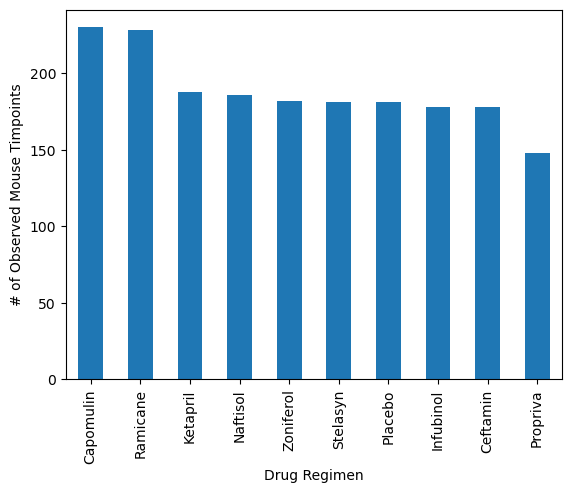

In [9]:
num_drug_regimen = mouse_clean_data["Drug Regimen"].value_counts()
# print(num_drug_regimen)
num_drug_regimen.plot(kind="bar",ylabel="# of Observed Mouse Timpoints",)

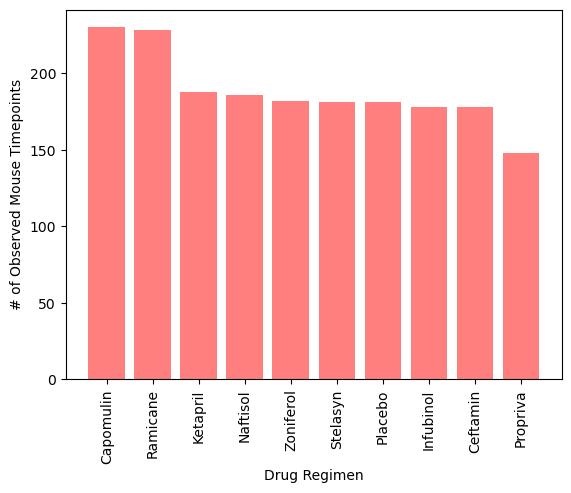

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
num_drug_regimen_df = num_drug_regimen.to_frame()
num_drug_regimen_df = num_drug_regimen_df.reset_index()
x_axis = np.arange(len(num_drug_regimen_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, num_drug_regimen_df["count"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, num_drug_regimen_df["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

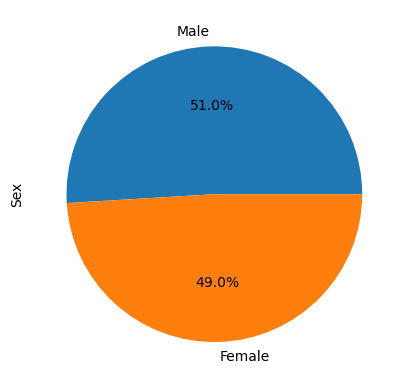

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
num_mouse_sex = mouse_clean_data["Sex"].value_counts()
# num_mouse_sex
num_mouse_sex.plot(kind="pie",ylabel="Sex",autopct='%1.1f%%')

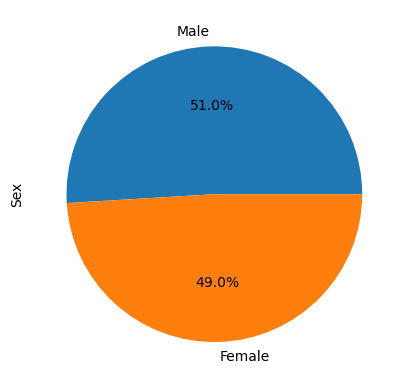

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
num_mouse_sex_df = num_mouse_sex.to_frame()
num_mouse_sex_df = num_mouse_sex_df.reset_index()
num_mouse_sex_df
plt.pie(num_mouse_sex_df["count"], autopct="%1.1f%%",labels=num_mouse_sex_df["Sex"])
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Capomulin
Capomulin_tumor_vol = mouse_clean_data.loc[mouse_clean_data["Drug Regimen"]=="Capomulin"]
Capomulin_tumor_vol

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_greatest_time = Capomulin_tumor_vol.groupby("Mouse ID").max()["Timepoint"].to_frame()
Capomulin_greatest_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_combined = pd.merge(Capomulin_greatest_time,mouse_clean_data,on=("Mouse ID","Timepoint"),how="left")
Capomulin_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [41]:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Ramicane
Ramicane_tumor_vol = mouse_clean_data.loc[mouse_clean_data["Drug Regimen"]=="Ramicane"]
Ramicane_tumor_vol

# Start by getting the last (greatest) timepoint for each mouse
Ramicane_greatest_time = Ramicane_tumor_vol.groupby("Mouse ID").max()["Timepoint"].to_frame()
Ramicane_greatest_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ramicane_combined = pd.merge(Ramicane_greatest_time,mouse_clean_data,on=("Mouse ID","Timepoint"),how="left")
Ramicane_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20
5,c758,45,33.397653,1,Ramicane,Male,9,17
6,d251,45,37.311236,2,Ramicane,Female,8,19
7,e662,45,40.659006,2,Ramicane,Male,8,24
8,g791,45,29.128472,1,Ramicane,Male,11,16
9,i177,45,33.562402,3,Ramicane,Male,10,18


In [42]:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Infubinol
Infubinol_tumor_vol = mouse_clean_data.loc[mouse_clean_data["Drug Regimen"]=="Infubinol"]
Infubinol_tumor_vol

# Start by getting the last (greatest) timepoint for each mouse
Infubinol_greatest_time = Infubinol_tumor_vol.groupby("Mouse ID").max()["Timepoint"].to_frame()
Infubinol_greatest_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Infubinol_combined = pd.merge(Infubinol_greatest_time,mouse_clean_data,on=("Mouse ID","Timepoint"),how="left")
Infubinol_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28
5,c326,5,36.321346,0,Infubinol,Female,18,25
6,c895,30,60.969711,2,Infubinol,Female,7,29
7,e476,45,62.435404,1,Infubinol,Male,23,26
8,f345,45,60.918767,1,Infubinol,Male,23,26
9,i386,40,67.289621,4,Infubinol,Female,23,29


In [45]:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Ceftamin
Ceftamin_tumor_vol = mouse_clean_data.loc[mouse_clean_data["Drug Regimen"]=="Ceftamin"]
Ceftamin_tumor_vol

# Start by getting the last (greatest) timepoint for each mouse
Ceftamin_greatest_time = Ceftamin_tumor_vol.groupby("Mouse ID").max()["Timepoint"].to_frame()
Ceftamin_greatest_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ceftamin_combined = pd.merge(Ceftamin_greatest_time,mouse_clean_data,on=("Mouse ID","Timepoint"),how="left")
Ceftamin_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25
5,h531,5,47.784682,0,Ceftamin,Male,5,27
6,j296,45,61.849023,3,Ceftamin,Female,24,30
7,k210,45,68.923185,3,Ceftamin,Male,15,28
8,l471,45,67.748662,1,Ceftamin,Female,7,28
9,l490,30,57.918381,3,Ceftamin,Male,24,26


In [57]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
tumor_vol_data = [
    Capomulin_combined["Tumor Volume (mm3)"],
    Ramicane_combined["Tumor Volume (mm3)"],
    Infubinol_combined["Tumor Volume (mm3)"],
    Ceftamin_combined["Tumor Volume (mm3)"]
]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in range(len(treatment_list)):
    # print(x)
    quartiles = tumor_vol_data[x].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = []
    for y in range(len(tumor_vol_data[x])):
        if (tumor_vol_data[x][y] < lower_bound) or (tumor_vol_data[x][y] > upper_bound):
            outliers.append(tumor_vol_data[x][y])

    print(f"{treatment_list[x]}:")
    print(f"The lower quartile of {treatment_list[x]} is: {lowerq}")
    print(f"The upper quartile of {treatment_list[x]} is: {upperq}")
    print(f"The interquartile range of {treatment_list[x]} is: {iqr}")
    print(f"The median of {treatment_list[x]} is: {quartiles[0.5]}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    if outliers:
        print(f"{treatment_list[x]} has outliers: {outliers}")
    else:
        print(f"{treatment_list[x]} has no outliers")
    print("-------------------------------------------------------------")


Capomulin:
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin has no outliers
-------------------------------------------------------------
Ramicane:
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane has no outliers
-------------------------------------------------------------
Infubinol:
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046
Values below 36.83290494

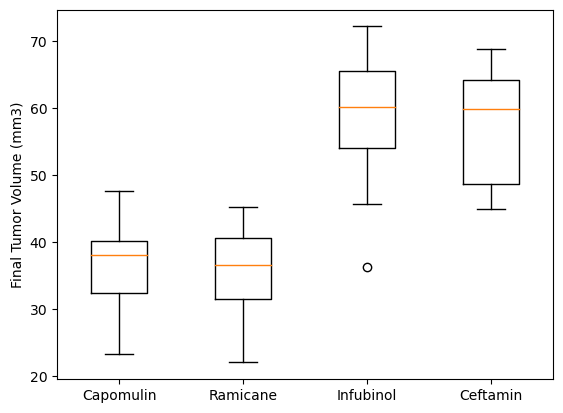

In [64]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.boxplot(tumor_vol_data,labels=treatment_list)
plt.show()

## Line and Scatter Plots

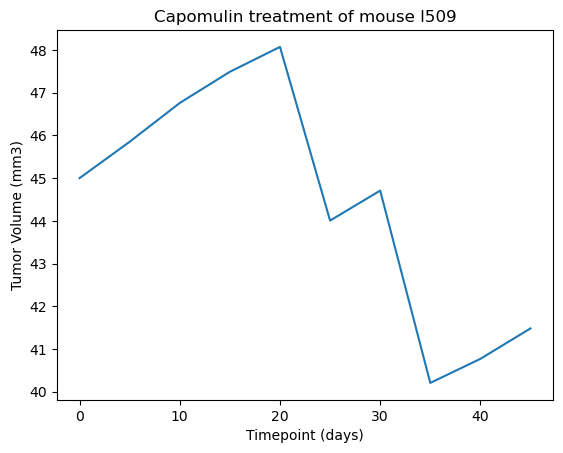

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


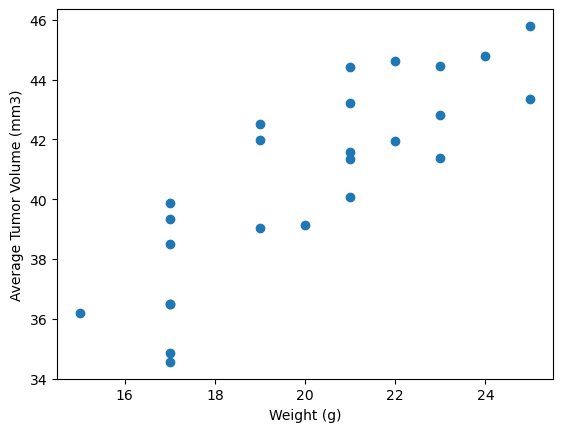

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


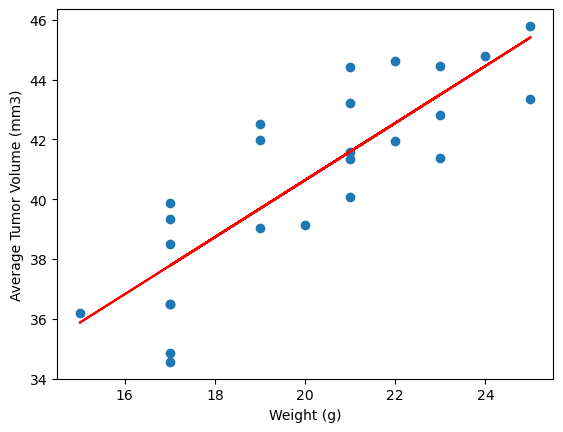

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
